In [64]:
import hhgen.io as io
import hhgen.utils as utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reload(io)
def get_data(fname,proc):
    tdir = 'genDiphotonDumper/trees'

    untagged = tdir+'/'+proc+'_13TeV_NoTag_0'
    tagged = tdir+'/'+proc+'_13TeV_DoubleHTag_%d'

    return io.read_trees(fname,untagged,tagged,12)


In [65]:
reload(utils)
def calc_features(df):
    for part in "leadPho","subleadPho","leadJet","subleadJet":
        utils.calc_p4extra(df,part)
    utils.calc_sump4(df,"hgg","leadPho","subleadPho")
    utils.calc_sump4(df,"hbb","leadJet","subleadJet")
    utils.calc_sump4(df,"hh","hbb","hgg")
    df["hh_delta_eta"] = np.abs(df["hgg_eta"] - df["hbb_eta"])

In [66]:
files = ! ls /t3home/musella/Analysis/HH_8_0_28/src/HHbbgg_ETH/Flashgg/work/gen_analysis/*madgraph.root

In [67]:
import os

dfs = {}
for ifil in files:
    fname = os.path.basename(ifil)
    proc = fname.replace("output_","").replace(".root","").replace("-","_")
    df = get_data(ifil,proc)
    proc = proc.replace("GluGluToHHTo2B2G_","").replace("_13TeV_madgraph","")
    calc_features(df)
    dfs[proc] = df
    procs.append(proc)

In [68]:
print(dfs["node_SM"].columns)
calc_features(dfs["node_SM"])
print(dfs["node_SM"].columns)

Index([u'candidate_id', u'weight', u'mgg', u'mbb', u'leadPho_px',
       u'leadPho_py', u'leadPho_pz', u'leadPho_e', u'subleadPho_px',
       u'subleadPho_py', u'subleadPho_pz', u'subleadPho_e', u'leadJet_px',
       u'leadJet_py', u'leadJet_pz', u'leadJet_e', u'subleadJet_px',
       u'subleadJet_py', u'subleadJet_pz', u'subleadJet_e', u'rho', u'nvtx',
       u'event', u'lumi', u'processIndex', u'run', u'npu', u'puweight', u'cat',
       u'leadPho_pt', u'leadPho_eta', u'leadPho_phi', u'leadPho_m',
       u'subleadPho_pt', u'subleadPho_eta', u'subleadPho_phi', u'subleadPho_m',
       u'leadJet_pt', u'leadJet_eta', u'leadJet_phi', u'leadJet_m',
       u'subleadJet_pt', u'subleadJet_eta', u'subleadJet_phi', u'subleadJet_m',
       u'hgg_px', u'hgg_py', u'hgg_pz', u'hgg_e', u'hgg_pt', u'hgg_eta',
       u'hgg_phi', u'hgg_m', u'hbb_px', u'hbb_py', u'hbb_pz', u'hbb_e',
       u'hbb_pt', u'hbb_eta', u'hbb_phi', u'hbb_m', u'hh_px', u'hh_py',
       u'hh_pz', u'hh_e', u'hh_pt', u'hh_eta', u'hh

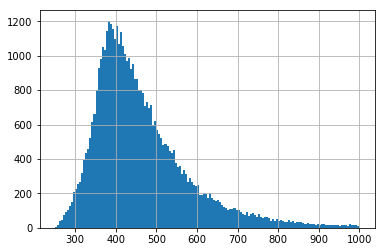

In [69]:
dfs["node_SM"].hh_m.hist(range=[250,1000],bins=150)
plt.show()

In [70]:
for proc,df in dfs.items():
    df.to_hdf(proc+".hd5",proc,mode="w")

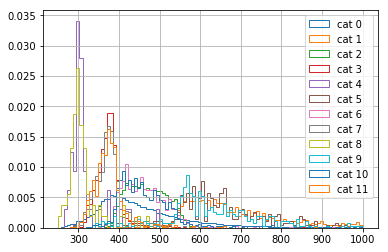

In [71]:
gbycat = dfs["node_SM"].groupby('cat')

for icat in range(12):
    dfc = gbycat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=100,normed=True,histtype="step",label="cat %d" % icat)  
plt.legend()
plt.show()

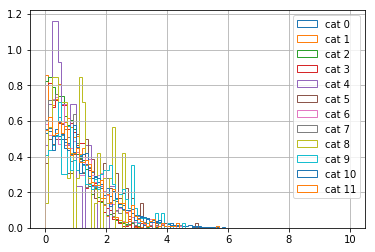

In [73]:
for icat in range(12):
    dfc = gbycat.get_group(icat)
    dfc.hh_delta_eta.hist(range=[0,10],bins=100,normed=True,histtype="step",label="cat %d" % icat)  
plt.legend()
plt.show()